In [44]:
%pylab inline
import numpy as np
from skimage import data
coins = data.coins()
histo = np.histogram(coins, bins=np.arange(0, 256))

Populating the interactive namespace from numpy and matplotlib


In [6]:
filename = "H048-590_BPF.tif"
from skimage import io
HY590 = io.imread(HY590)

In [7]:
type(HY590)

numpy.ndarray

In [8]:
HY590.shape

(960, 1280)

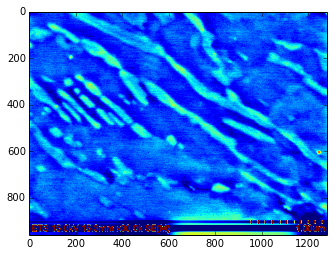

In [47]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.imshow(HY590)
plt.show()

In [11]:
from skimage.feature import canny
edges = canny(HY590/255.)

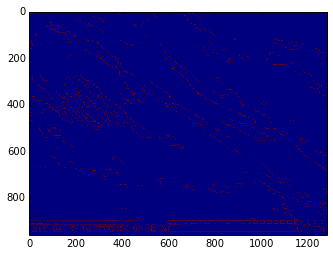

In [46]:
plt.figure(2)
plt.imshow(edges)
plt.show()

(256,) (255,)


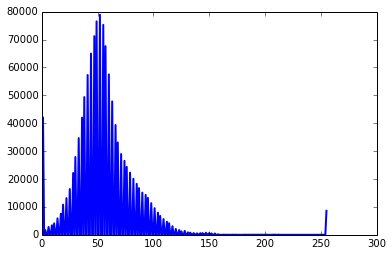

In [45]:
histo, bins = np.histogram(HY590, bins=np.arange(0, 256))
print bins.shape, histo.shape
plt.plot(bins[1:], histo, lw=2)
plt.show()

960 1280


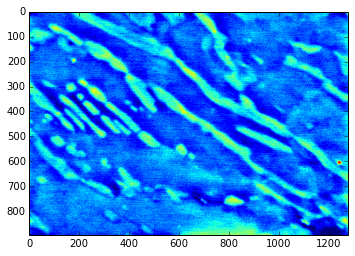

In [100]:
filename = "H048-590_BPF.tif"
HY590_02 = io.imread(filename)
lx, ly = HY590_02.shape
print lx, ly
cHY590 = HY590_02[:-65, :]
imshow(cHY590)

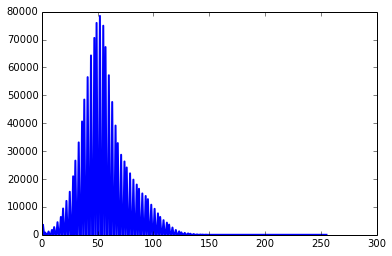

In [101]:
histo, bins = histogram(cHY590, bins=np.arange(0, 256))
plot(bins[1:], histo, lw=2)

(-0.5, 1279.5, 894.5, -0.5)

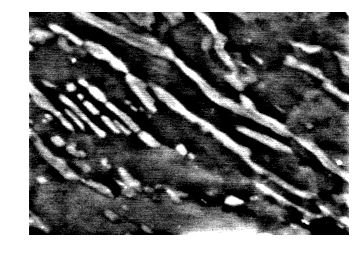

In [102]:
imshow(cHY590, cmap=plt.cm.gray, vmin=40, vmax=100)
# Remove axes and ticks
axis('off')

0.0 127.0


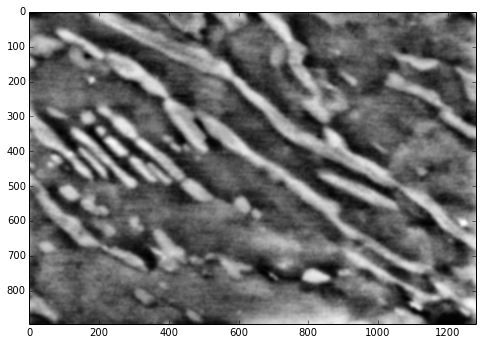

In [219]:
from skimage import exposure
from scipy import ndimage
rcParams['figure.figsize'] = 8, 6

v_min, v_max = np.percentile(cHY590, (0.2, 99.8))
print v_min, v_max
better_contrast = exposure.equalize_adapthist(cHY590, clip_limit=0.03)
better_contrast_02 = exposure.rescale_intensity(cHY590, in_range=(v_min, v_max))
#blurred_HY590 = ndimage.median_filter(better_contrast, size=(10, 10))
#blurred_HY590_02 = ndimage.gaussian_filter(better_contrast_02, sigma=5.0)
blurred_HY590 = ndimage.gaussian_filter(better_contrast, sigma=3.0)

#f, (ax1, ax2) = subplots(1, 2, sharey=True)
imshow(blurred_HY590, cmap=plt.cm.gray)
#ax2.imshow(blurred_HY590_02, cmap=plt.cm.gray)


#axis('off')

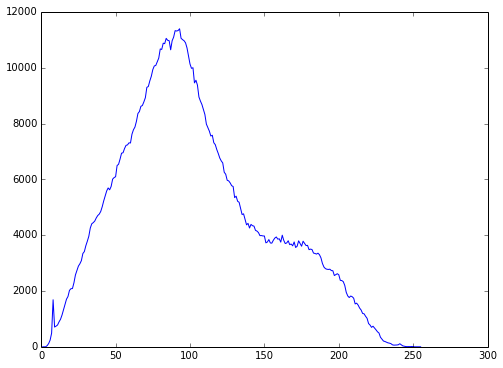

In [221]:
histo, bins = histogram(blurred_HY590*256, bins=np.arange(0, 256))

plot(bins[1:], histo)
#print histo

In [203]:
edges = canny(better_contrast_02, sigma=1.)
from scipy import ndimage as ndi
fill_coins = ndi.binary_fill_holes(edges)

#imshow(fill_coins, cmap=plt.cm.gray)

In [204]:
sx = ndimage.sobel(blurred_HY590, axis=0, mode='constant')
sy = ndimage.sobel(blurred_HY590, axis=1, mode='constant')
sob = np.hypot(sx, sy)

#imshow(sob)

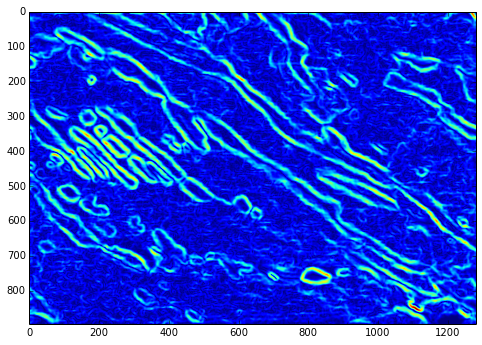

In [222]:
from skimage.filters import sobel
elev_map = sobel(blurred_HY590*256)

imshow(elev_map)

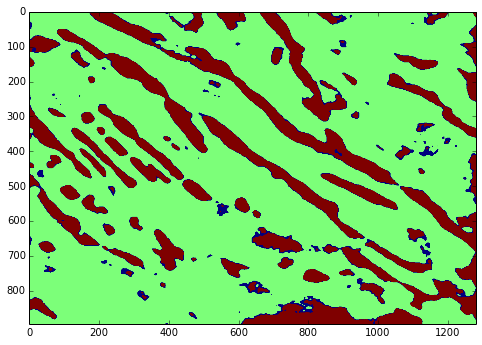

In [223]:
markers = zeros_like(blurred_HY590)
markers[blurred_HY590*256 < 135] = 1
markers[blurred_HY590*256 > 145] = 2

imshow(markers)

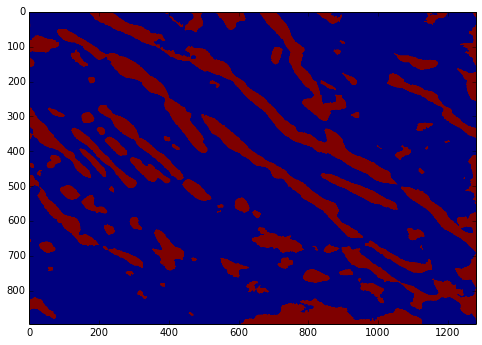

In [224]:
from skimage.morphology import watershed
segmentation = watershed(sob, markers)
#labeled_HY590, _ = ndi.label(segmentation)


imshow(segmentation)